<a href="https://colab.research.google.com/github/arstotrix/lsh-digital-collector/blob/main/digital_repo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/_ЛШ2020-2021-2022-????_/лш2022/Варя таск/Список пожертвовавших через сайт (2022) __ Обновляется ежедневно.xlsx')
df = pd.read_excel('/content/drive/MyDrive/_ЛШ2020-2021-2022-????_/лш2022/Варя таск/Списки участников мастерских 2022.xlsx')

In [ ]:
df1

,Unnamed: 0,Пожертвовавший
0,2022-08-09 11:53:16,Киселёв Роман Андреевич
1,2022-08-09 19:11:31,Первухина Валерия Игоревна
2,2022-06-23 15:18:25,Подколзина Мария Алексеевна
3,2022-06-23 19:34:12,Аверина Анастасия Андреевна
4,2022-06-24 11:06:14,Фиронова Маргарита Александровна
...,...,...
527,2022-08-11 18:21:58,Глушанина Мария Евгеньевна
528,2022-08-11 00:42:15,Колодин Никита Алексеевич
529,2022-08-11 06:50:56,Шпотин Никита Валерьевич
530,2022-08-11 09:44:57,Каширских Анна Михайловна


In [ ]:
payers = list(df1['Пожертвовавший'])

In [ ]:
def abcde(a):
  i = 0
  if a in payers:
    i = 1
  return i

In [ ]:
def short(a):
  return a[:8]

In [ ]:
df['Плательщики'] = df['ФИО'].apply(abcde)

In [ ]:
df["Мастерская_короткая"] = df['Мастерская'].apply(short)

In [ ]:
not_paid = df[df['Плательщики'] == 0].groupby('Мастерская_короткая').count()['ФИО']
paid = df[df['Плательщики'] == 1].groupby('Мастерская_короткая').count()['ФИО']
not_paid
for i in not_paid.index:
#  print(i)
  if i not in paid.index:
    paid[i] = 0
for i in paid.index:
  if i not in not_paid.index:
    not_paid[i] = 0

In [ ]:
paid = pd.Series.sort_index(paid)
not_paid = pd.Series.sort_index(not_paid)

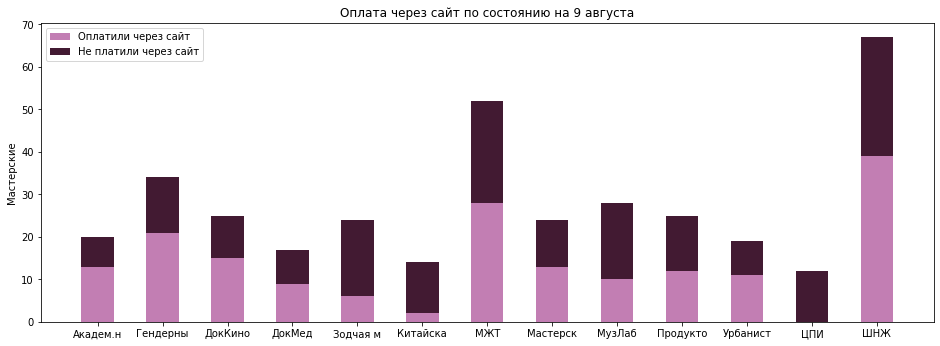

In [ ]:
fig, ax = plt.subplots()
width = 0.5
plt.rcParams["figure.figsize"] = (16,5.5)

ax.bar(paid.index, paid, width, label='Оплатили через сайт', color = '#C27EB3')
ax.bar(not_paid.index, not_paid, width, bottom = paid, label='Не платили через сайт', color = '#421A32')

ax.set_ylabel('Мастерские')
ax.set_title('Оплата через сайт по состоянию на 9 августа')
ax.legend()

fig.show()
plt.savefig('/content/drive/MyDrive/_ЛШ2020-2021-2022-????_/лш2022/Варя таск_2')

In [ ]:
df.groupby(['Мастерская', "Плательщики"]).count()['ФИО']

Мастерская                      Плательщики
Академ.навыки                   0               7
                                1              13
Гендерные Исследования          0              13
                                1              21
ДокКино                         0              10
                                1              15
ДокМед                          0               8
                                1               9
Зодчая мастерская               0              18
                                1               6
Китайская мастерская            0              12
                                1               2
МЖТ                             0              24
                                1              28
Мастерская культурной медиации  0              11
                                1              13
МузЛаб                          0              18
                                1              10
Продуктовые исследования        0              13
      

In [ ]:
df[(df['Мастерская'] == 'Гендерные Исследования') & (df['Плательщики'] == 0)]

,ФИО,Мастерская,Плательщики,Мастерская_короткая
238,Бурлакова Алена Сергеевна,Гендерные Исследования,0,Гендерны
246,Волкова Анна Дмитриевна,Гендерные Исследования,0,Гендерны
251,Зыкова Дарья Александровна,Гендерные Исследования,0,Гендерны
253,Кузьмина Наталья Егоровна,Гендерные Исследования,0,Гендерны
254,Соколов Евгений Сергеевич,Гендерные Исследования,0,Гендерны
256,Витальская Аполлинария Ильинична,Гендерные Исследования,0,Гендерны
263,Анна Край (Иванова),Гендерные Исследования,0,Гендерны
264,Кулиева Алмара,Гендерные Исследования,0,Гендерны
265,Головина Анна,Гендерные Исследования,0,Гендерны
266,Погребняк Мария,Гендерные Исследования,0,Гендерны
